##**Збіжність метода Нелдера-Міда при мінімізації функції Розенброка. Метод ковзного допуску**

# Лукіна Мілена, КМ-81

## ПОСТАНОВКА ЗАДАЧІ

Дослідити збіжність метода Нелдера-Міда при мінімізації функції Розенброка в
залежності від:
1. Розміру початкового симплексу.
2. Значень параметрів деформації та редукції багатогранника.
3. Модифікацій метода.
Використати метод ковзного допуску для умовної оптимізації в залежності 
від:
1. Розташування локального мінімума (всередині/поза допустимою
областю).
2. Виду допустимої області (випукла/невипукла).
3. Різновидів обмежень.



## Імпорт бібліотек та допоміжних функцій

1.   numpy
2.   numpy.linalg.norm
3.   math
4.   matplotlib.pyplot
5.   matplotlib.cm
6.   mpl_toolkits.mplot3d.Asex3D
7.   scipy.optimize
8.   time

In [ ]:
import numpy as np
from numpy.linalg import norm
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import time

## Основні функції

Функція Розенброка: $~~z = (1-x)^{2} + 100(y-x^2)^2$ .

In [ ]:
def R(x, y):
  return (1 - x)**2 + 100 * (y - x**2)**2

x_arr = np.arange(-2, 2, 0.01)
y_arr = np.arange(-1, 3, 0.01)
R_arr = np.array([[R(x, y) for x in x_arr] for y in y_arr])

Частинні похідні функції Розенброка

In [ ]:
def dRdx(x, y):
  return - 2 * (1 - x) - 400 * x * (y - x**2)


def dRdy(x, y):
  return 200 * (y - x**2)

## Обчислення

Побудова графіка функції Розенброка.

https://matplotlib.org/

https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html

In [ ]:
def rozenbrock_graph1():
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  surf = ax.plot_surface(x, y, R_arr, cmap = cm.Spectral, linewidth = 0, antialiased = False)
  
  fig.colorbar(surf, shrink = 0.5, aspect = 5)

  plt.show()

Графік ізоліній:

In [ ]:
def rozenbrock_graph2():
  x = np.linspace(-2, 2, 100)
  y = np.linspace(-1, 3, 100)
  X, Y = np.meshgrid(x,y)
  Z = R(X, Y)

  fig = plt.figure(0)
  plt.clf()
  plt.contourf(X, Y, Z, 25)
  plt.colorbar()
  plt.contour(X, Y, Z, 25, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")
  
  plt.show()

Монотонний варіант для більш зручної подальшої візуалізації:

In [ ]:
def rozenbrock_graph3():
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr)

  plt.show()

Фукнція **nelder_mid_opt** реалізує метод Нелдера-Міда за допомогою функції minimize модулю scipy.optimize на прикладі функції Розенброка. 

---
Параметри функції: (x_init, y_init) - початкова точка, eps - точність пошуку екстремума.

In [ ]:
def nelder_mid_opt(x_init, y_init, eps):
  # реалізація функції Розенброка, який приймає на вхід один аргумент: кортеж з координат (x, y)
  def R1(point):
    return R(point[0], point[1])

  result = opt.minimize(R1, (x_init, y_init), method='Nelder-Mead', options={'xtol': eps})
  
  # координати отриманої точки
  print(f'\033[1mОтриимана точка: ({result.x[0]}, {result.x[1]})\033[0m')
  # значення функції Розенброка в отриманій точці
  print('\033[3mЗначення функції Розенброка в отриманій точці: %.13f' %R(result.x[0], result.x[1]))
  # кількість ітерацій пошуку
  print('Кількість ітерацій пошуку: %d' %result.nit)
  # відстань до точки глобального мінімуму (1, 1)
  dist = norm([1 - result.x[0], 1 - result.x[1]])
  print('Відстань до точки глобального мінімуму (1, 1): %.7f\033[0m' %dist)

  # повертає координати отриманої точки
  return result.x

Функція **nelder_mid_opt_visual** візуалізує пошук мінімуму функції Розенброка за допомогою функції nelder_mid_opt.

---

Параметри функції: (x_init, y_init) - початкова точка, eps - точність пошуку екстремума.

In [ ]:
def nelder_mid_opt_visual(x_init, y_init, eps):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='y', alpha=0.4)

  # відображення початкової точки
  ax.scatter(x_init, y_init, R(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, R(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  # відображення отриманої точки
  x_min, y_min = nelder_mid_opt(x_init, y_init, eps)
  ax.scatter(x_min, y_min, R(x_min, y_min), c='blue', s=35)
  ax.text(x_min + .1, y_min + .1, R(x_min, y_min) + .06, 'Отримана точка', fontsize=12)

  plt.show()

Функція **initial_optimal_simplex** реалізує формування "оптимального" початкового симплексу (необхідно для подальшої альтернативної реалізації методу Нелдера-Міда)

---

Параметри: (x_init, y_init) - початкова точка, L - довжина ребра початкового симплексу, initial_simplex - початковий симплекс.

In [ ]:
def init_optimal_simplex(X, L, n, initial_simplex):
  qn = math.sqrt(1.0 + n) - 1.0
  q2 = L / math.sqrt(2.0) * n
  r1 = q2 * (qn + n)
  r2 = q2 * qn
  initial_simplex[0, :] = X
  for j in range(n):
      initial_simplex[j + 1, :] = X + r2
  for i in range(n):
      initial_simplex[i + 1, i] += (r1 - r2)

Функція **nelder_mid_opt_alt** є альтернативна реалізація методу Нелдера-Міда на прикладі функції Розенброка із застосуванням функції minimize модулю scipy.optimize та процедурою формування "оптимального" початкового симплексу.

---

Параметри: (x_init, y_init) - початкова точка, L - довжина ребра початкового сімплекса, eps - точність розрахунку.

In [ ]:
def nelder_mid_opt_alt(x_init, y_init, L, eps):
  # реалізація функції Розенброка, який приймає на вхід один аргумент: кортеж з координат (x, y)
  def R1(point):
    return R(point[0], point[1])
  
  # формування "оптимального" початкового симплексу
  n = 2
  X = np.zeros(2, dtype=float)
  X[0], X[1] = x_init, y_init
  initial_simplex = np.zeros((n + 1, n), dtype=float)
  init_optimal_simplex(X, L, n, initial_simplex)

  result = opt.minimize(R1, (x_init, y_init), method='Nelder-Mead', options={'xtol': eps, 'initial_simplex': initial_simplex})
  
  # координати отриманої точки
  print(f'\033[1mОтримана точка: ({result.x[0]}, {result.x[1]})\033[0m')
  # значення функції Розенброка в отриманій точці
  print('\033[3mЗначення функції Розенброка в отриманій точці: %.13f' %R(result.x[0], result.x[1]))
  # кількість ітерацій пошуку
  print('Кількість ітерацій пошуку: %d' %result.nit)
  # відстань до точки глобального мінімуму (1, 1)
  dist = norm([1 - result.x[0], 1 - result.x[1]])
  print('Відстань до точки глобального мінімуму (1, 1): %.7f\033[0m' %dist)

  # повертає координати отриманої точки
  return result.x

Функція **nelder_mid_opt_alt_visual** візуалізує пошук мінімуму функції Розенброка за допомогою функції nelder_mid_opt_alt.

---

Параметри: (x_init, y_init) - початкова точка, L - довжина ребра початкового сімплекса, eps - точність розрахунку.

In [ ]:
def nelder_mid_opt_alt_visual(x_init, y_init, L, eps):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='y', alpha=0.4)

  # відображення початкової точки
  ax.scatter(x_init, y_init, R(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, R(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  # відображення отриманої точки
  x_min, y_min = nelder_mid_opt_alt(x_init, y_init, L, eps)
  ax.scatter(x_min, y_min, R(x_min, y_min), c='blue', s=35)
  ax.text(x_min + .1, y_min + .1, R(x_min, y_min) + .06, 'Отримана точка', fontsize=12)

  plt.show()

Допоміжний клас **Vector** .

In [ ]:
class Vector(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)

Допоміжна функція **draw_triangle** для подальшої візуалізації метода Нелдера-Міда.

---

Параметри: f - функція, до якої буде застосований метод Нелдера-Міда; v1, v2, v3 - вершини симплекса; i - номер ітерації.

In [ ]:
def draw_triangle(f, v1, v2, v3):
  x = np.linspace(-0.6, 1.6, 100)
  y = np.linspace(0.8, 3.1, 100)
  X, Y = np.meshgrid(x,y)
  Z = f((X, Y))

  fig = plt.figure()
  plt.clf()
  plt.contourf(X, Y, Z, 20, alpha=0.7)
  plt.colorbar()
  plt.contour(X, Y, Z, 20, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")

  plt.plot([v1.x, v2.x], [v1.y, v2.y], color='red', linewidth=1.8)
  plt.plot([v1.x, v3.x], [v1.y, v3.y], color='red', linewidth=1.8)
  plt.plot([v2.x, v3.x], [v2.y, v3.y], color='red', linewidth=1.8)

Функція **nelder_mead_visual** реалізує метод Нелдера-Міда та його поітераційну візуалізацію.

---

Параметри: f - функція, яку потрібно мінімізувати, p1, p2, p3 - вершини початкового симплексу, eps - точність розрахунку.

Критерій закінчення: $~f(x^{(k)}) \leq \varepsilon$.

In [ ]:
def nelder_mead_visual(f, p1, p2, p3, eps, alpha=1, beta=0.5, gamma=2):
    v1 = Vector(*p1)
    v2 = Vector(*p2)
    v3 = Vector(*p3)

    adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
    points = sorted(adict.items(), key=lambda x: x[1])
        
    b = points[0][0]
    g = points[1][0]
    w = points[2][0]

    count = 0
    draw_triangle(f, v1, v2, v3)
    plt.scatter(b.x, b.y, color='red', s=40)

    dist = norm([1 - b.x, 1 - b.y]) 

    while dist > eps:
        count += 1

        adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        
        
        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)
        if f(xr.c()) < f(g.c()):
            w = xr
        else:
            if f(xr.c()) < f(w.c()):
                w = xr
            c = (w + mid)/2
            if f(c.c()) < f(w.c()):
                w = c
        if f(xr.c()) < f(b.c()):

            # expansion
            xe = mid + gamma * (xr - mid)
            if f(xe.c()) < f(xr.c()):
                w = xe
            else:
                w = xr
        if f(xr.c()) > f(g.c()):
            
            # contraction
            xc = mid + beta * (w - mid)
            if f(xc.c()) < f(w.c()):
                w = xc

        # update points
        v1 = w
        v2 = g
        v3 = b

        draw_triangle(f, v1, v2, v3)

        plt.scatter(b.x, b.y, color='red', s=40)

        dist = norm([1 - b.x, 1 - b.y]) 
    
    # координати отриманої точки
    print('\033[1mОтримана точка: (%.3f, %.3f)\033[0m' %(b.x, b.y))
    # значення функції Розенброка в отриманій точці
    print('\033[3mЗначення функції Розенброка в отриманій точці: %.2f' %R(b.x, b.y))
    # кількість ітерацій пошуку
    print('Кількість ітерацій пошуку: %d\033[0m' %count)

Метод золотого перетину.

http://dit.isuct.ru/IVT/sitanov/Literatura/M171/Pages/Glava1_3.htm

In [ ]:
def gold_ratio(f, a, b, eps):
  if a > b:
    a, b = b, a

  x1 = a + 0.382 * (b - a)
  x2 = b - 0.382 * (b - a)
  A = f(x1)
  B = f(x2)
  
  while b - a > eps:
    if A < B:
      b = x2
      if b - a < eps:
        break

      x2 = x1
      B = A
      x1 = a + 0.382 * (b - a)
      A = f(x1)
    else:
      a = x1
      if b - a < eps:
        break

      x1 = x2
      A = B
      x2 = b - 0.382 * (b - a)
      B = f(x2)

  return (a + b) / 2

In [ ]:
def descent_optim_N(N, lmd, x_init, y_init, eps_lmd):
  x = np.linspace(0.4, 1.2, 100)
  y = np.linspace(0.9, 2.1, 100)
  X, Y = np.meshgrid(x,y)
  Z = R(X, Y)

  fig = plt.figure()
  plt.clf()
  plt.contourf(X, Y, Z, 10, alpha=0.7)
  plt.colorbar()
  plt.contour(X, Y, Z, 10, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")

  a = 0
  b = 2 * lmd
  
  count = 0
  
  plt.scatter(x_init, y_init, c='red', s=45)

  for i in range(N):
    count += 1
    plt.scatter(x_init, y_init, c='red', s=15)

    def f(lmd):
      return R(x_init - lmd * dRdx(x_init, y_init), y_init - lmd * dRdy(x_init, y_init))
    
    lmd = gold_ratio(f, a, b, eps_lmd)

    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

  plt.scatter(x_init, y_init, c='red', s=45)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))

Функція **descent_method** реалізує метод найскорішого спуску з оптимальним кроком на прикладі функції Розенброка.

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження виконання по часу.

Критерій закінчення: попадання в $\varepsilon$-окіл точки (1, 1).

In [ ]:
def descent_method(lmd, x_init, y_init, eps, eps_lmd, t=15):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()


  ax.scatter(x_init, y_init, R(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, R(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  dist = norm([1 - x_init, 1 - y_init])

  while dist > eps:
    count += 1
    ax.scatter(x_init, y_init, R(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return R(x_init - lmd * dRdx(x_init, y_init), y_init - lmd * dRdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

    dist = norm([1 - x_init, 1 - y_init])

    if time.time() - start > t:      
      break

  ax.scatter(x_init, y_init, R(x_init, y_init), c='blue', s=37)
  ax.text(x_init + .1, y_init + .1, R(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)
  print(r'Значення функції: %.13f' %R(x_init, y_init))

**Метод ковзного допуску на прикладі функції Розенброка**

In [ ]:
# обмеження на пошук мінімуму
def h1(x, y):
  return (x - 1)**2 + (y - 2.5)**2 - 2.25

In [ ]:
def graph9():
  x = np.linspace(0.75, 3.25, 100)
  y = np.linspace(0.75, 3.25, 100)
  X, Y = np.meshgrid(x,y)
  Z = R(X, Y)
  Z1 = h1(X, Y)

  fig = plt.figure(0)
  plt.clf()
  plt.contourf(X, Y, Z, 10, alpha=0.7)
  plt.colorbar()
  plt.contour(X, Y, Z, 10, colors='black')
  plt.contour(X, Y, Z1, [0], colors='red')
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")

  plt.show()

In [ ]:
  def graph10():
    x = np.linspace(0.75, 3.25, 100)
    y = np.linspace(0.75, 3.25, 100)
    X, Y = np.meshgrid(x,y)
    Z = R(X, Y)
    Z1 = h1(X, Y)

    fig = plt.figure(0)
    plt.clf()
    plt.contourf(X, Y, Z, 10, alpha=0.7)
    plt.colorbar()
    plt.contour(X, Y, Z, 10, colors='black')
    plt.contour(X, Y, Z1, [0], colors='red')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(2.5, 2.5, c='red', s=40)
    plt.plot([2, 2.5], [2.211, 3.077], color='red', linewidth=1.8)
    plt.plot([2.5, 3], [3.077, 2.211], color='red', linewidth=1.8)
    plt.plot([2, 3], [2.211, 2.211], color='red', linewidth=1.8)

    plt.show()

In [ ]:
  def graph11():
    x = np.linspace(0.75, 3.25, 100)
    y = np.linspace(0.75, 3.25, 100)
    X, Y = np.meshgrid(x,y)
    Z = R(X, Y)
    Z1 = h1(X, Y)

    fig = plt.figure(0)
    plt.clf()
    plt.contourf(X, Y, Z, 10, alpha=0.7)
    plt.colorbar()
    plt.contour(X, Y, Z, 10, colors='black')
    plt.contour(X, Y, Z1, [0], colors='red')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot([2, 2.5], [2.211, 3.077], color='red', linewidth=1.8)
    plt.plot([2.5, 3], [3.077, 2.211], color='red', linewidth=1.8)
    plt.plot([2, 3], [2.211, 2.211], color='red', linewidth=1.8)
    plt.scatter(3, 2.211, color='red')
    plt.scatter(2.25, 2.644, color='red')
    plt.scatter(1.5, 3.077, color='red')
    plt.arrow(3, 2.211, 1.5 - 2.85, 3.077 - 2.295, head_width=0.08, width=0.01, linestyle='--')
    plt.show()

In [ ]:
def graph12():
    x = np.linspace(-0.5, 3.25, 100)
    y = np.linspace(0.75, 4.25, 100)
    X, Y = np.meshgrid(x,y)
    Z = R(X, Y)
    Z1 = h1(X, Y)

    fig = plt.figure(0)
    plt.clf()
    plt.contourf(X, Y, Z, 10, alpha=0.7)
    plt.colorbar()
    plt.contour(X, Y, Z, 10, colors='black')
    plt.contour(X, Y, Z1, [0], colors='red')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot([2, 2.5], [2.211, 3.077], color='red', linewidth=1.8)
    plt.plot([2.5, 3], [3.077, 2.211], color='red', linewidth=1.8)
    plt.plot([2, 3], [2.211, 2.211], color='red', linewidth=1.8)
    plt.scatter(3, 2.211, color='red')
    plt.scatter(2.25, 2.644, color='red')
    plt.scatter(.75, 3.51, color='red')
    plt.arrow(3, 2.211, .93 - 3, 3.42 - 2.211, head_width=0.08, width=0.01, linestyle='--')

    plt.show()

## Відображення результатів

Побудуємо графік функції Розенброка на множині $~[-2,~ 2]\times[-1, ~3]$ .

Неважко перевірити (аналітично), що точкою глобального мінімуму функції Розенброка є точка (1, 1), в якій вона набуває значення 0.

Графік 1


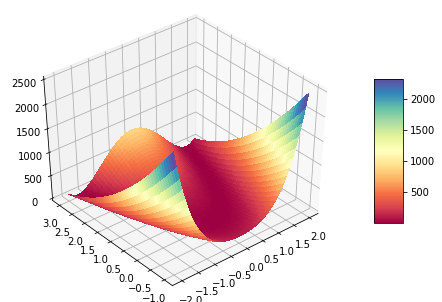

In [ ]:
print('Графік 1')
rozenbrock_graph1()

Графік ізоліній:

Графік 2


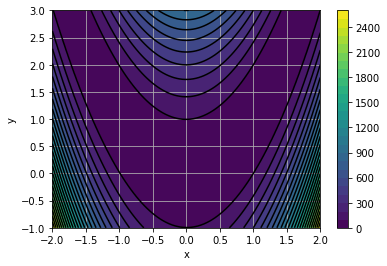

In [ ]:
print('Графік 2')
rozenbrock_graph2()

Надалі для більш зручної візуалізації застосування методів мінімізації будемо використовувати "монотонний" варіант графіка 1:

Графік 3


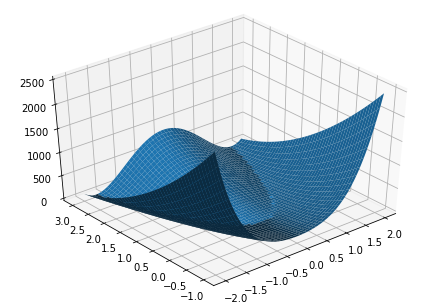

In [ ]:
print('Графік 3')
rozenbrock_graph3()

**Метод Нелдера-Міда на прикладі мінімізації функції Розенброка**

Для мінімізації функції Розенброка застосуємо метод Нелдера-Міда, реалізований з використанням функції minimize модулю scipy.optimize.

---

**Параметри:** початкова точка (2, -1), точність розрахунку eps = 0.00001 .

Графік 4

Отриимана точка: (0.9999979818917695, 0.9999959092949957)
Значення функції Розенброка в отриманій точці: 0.0000000000044
Кількість ітерацій пошуку: 75
Відстань до точки глобального мінімуму (1, 1): 0.0000046


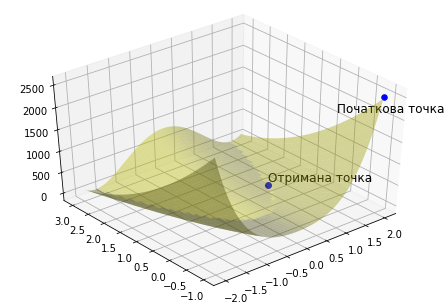

In [ ]:
print('Графік 4\n')

x_init = 2
y_init = -1
eps = 0.00001
nelder_mid_opt_visual(x_init, y_init, eps)

Розглянемо також альтернативну реалізацію метода Нелдера-Міда з використанням функції minimize модулю scipy.optimize та процедурою формування "оптимального" початкового симплексу.

---

**Параметри:** початкова точка (2, -1), довжина ребра початкового симплексу L = 0.4, точність розрахунку eps = 0.00001.

Графік 5

Отримана точка: (1.0000009035585624, 1.0000016404144652)
Значення функції Розенброка в отриманій точці: 0.0000000000036
Кількість ітерацій пошуку: 64
Відстань до точки глобального мінімуму (1, 1): 0.0000019


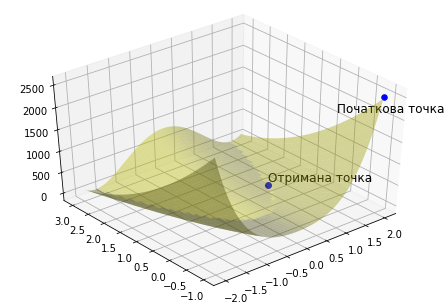

In [ ]:
print('Графік 5\n')

x_init = 2
y_init = -1
L = .4
eps = 0.00001
nelder_mid_opt_alt_visual(x_init, y_init, L, eps)

Візуалізуємо поітераційно пошук мінімуму функції Розенброка метдом Нелдера-Міда.

---
**Параметри:** вершини початкового симплексу p1 = (-0.5, 2), p2 = (-0.5, 3), p3 = (0.5, 1), точність розрахунку eps = 0.05 .

**Критерій закінчення:** попадання в $\varepsilon$-окіл точки (1, 1).


Графік 6

Отримана точка: (1.032, 1.026)
Значення функції Розенброка в отриманій точці: 0.15
Кількість ітерацій пошуку: 9


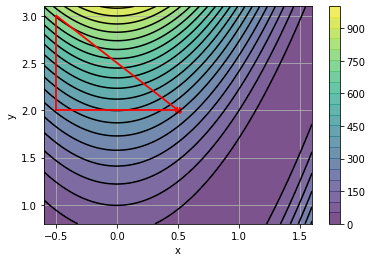

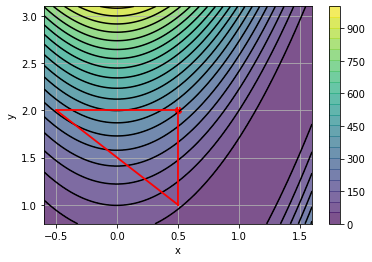

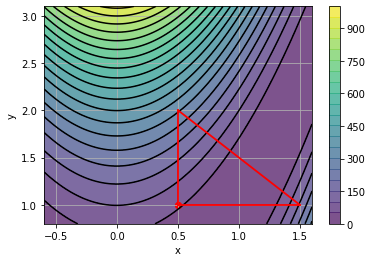

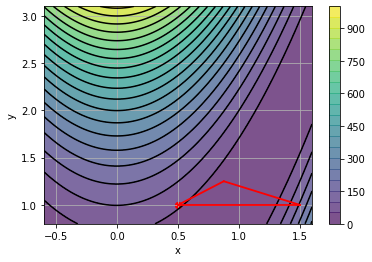

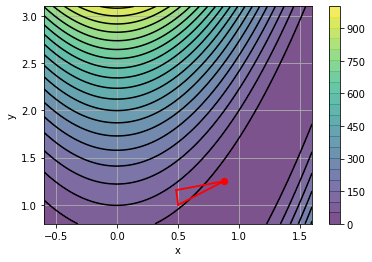

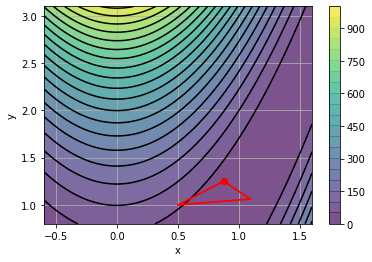

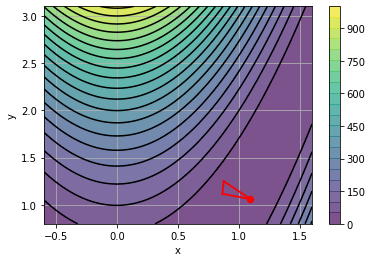

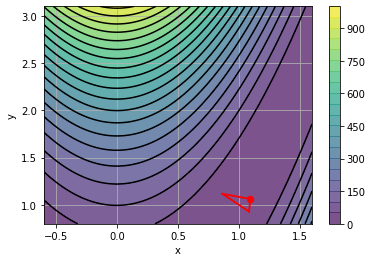

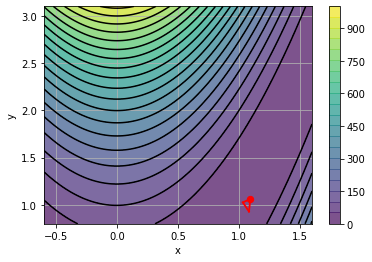

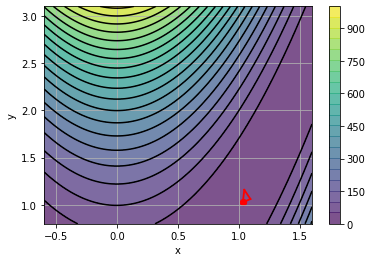

In [ ]:
print('Графік 6\n')

def R1(point):
  return R(point[0], point[1])

f = R1
p1 = (-0.5, 2)
p2 = (-0.5, 3)
p3 = (0.5, 2)
eps = 0.05

nelder_mead_visual(f, p1, p2, p3, eps)

Для порівняння ефективності розглянемо також результат перших 9 ітерацій методу найскорішого спуску з оптимальним кроком.

Графік 7


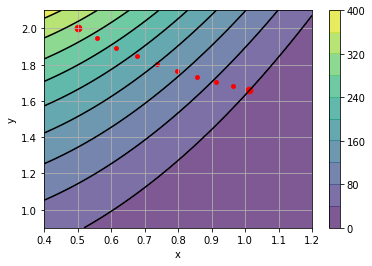


Отримана точка: (1.01024, 1.65885)


In [ ]:
print('Графік 7')
descent_optim_N(9, .0001, .5, 2, 0.0001)

Щоб робити висновки стосовно ефективнсті наведеного вище способу мінімізації, порівняємо отримані результати із результатами застосування до функції Розенброка методу найскорішого спуску.



**Критерій закінчення:** попадання в $\varepsilon$-окіл точки (1, 1), де $\varepsilon$ візьмемо рівним похибці результату, отриманого у результаті виконання функції nelder_mid_opt (графік 4).

---

**Параметри:** крок lmd = 0.01, початкова точка (2, -1.5), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.0001.

**Зауваження 1:** якщо протягом 15 секунд функція не досягає критерію закінчення, вона перериває своє виконання, виводить поточне значення $f(x^{(k)})$ та отриману точку. 

**Зауваження 2:** наведене обмеження за часом є обмеженням саме на пошук мінімуму (тобто виконання циклу while); загальний час виконання функції (пошук мінімуму та візуалізація результату) може істотно перевищувати вказане обмеження. 

Графік 8


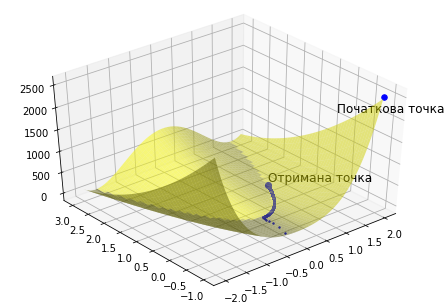


Отримана точка: (0.99976, 0.99951)
Кількість ітерацій: 6346
Значення функції: 0.0000000591252


In [ ]:
print('Графік 8')

lmd = 0.001
x_init = 2
y_init = -1
eps = 0.0000046
eps_lmd = 0.0001

descent_method(lmd, x_init, y_init, eps, eps_lmd)

**Метод ковзного допуску на прикладі мінімізації функції Розенброка**

Розглянемо наступну задачу:
мінімізувати функцію Розенброка при обмеженні $h_1(x,y)=(x - 1)^2 + (y - 2.5)^2 - 2.25 = 0$.

Рівні функції Розенброка та геометричне місце точок, для яких $h_1=0$, відображені на графіку 9:


Графік 9



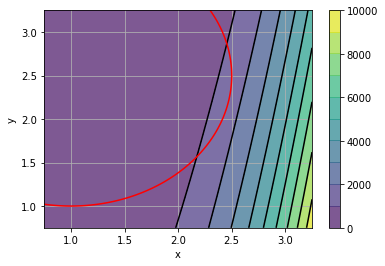

In [ ]:
print('Графік 9\n')  
graph9()

Розв'язком такої задачі є точка $x^*=[1~~1]^T$, в якій $R(x^*)=0$.

Відповідно до методу ковзного допуску описана вище задача перетворюється в задачу: мінімізувати $R(x)$ за обмеженням $\Phi^{(k)}-T(x)\geq0$, де $T(x)=[(x - 1)^2 + (y - 2.5)^2 - 2.25]^{1/2}$.

В якості початкового вектору оберемо $x^{(0)}=[2.5~~~2.5]^T$, а величини, що характеризує розмір початкового багатокутника, $t =1$ (при цьому будемо мати трикутник з одиничними ребрами та центром мас в точці $x^{(0)}$). Отже, маємо $t = 1, ~m = 1$, відповідно $\Phi^{(0)} = 4$. Вершини початкового багатокутника розташовані в точках $x_1^{(0)} = [2~~~2.211]^T$, $x_2^{(0)} = [3~~~2.211]^T$, $x_3^{(0)} = [2.5~~~3.077]^T$.

Графік 10



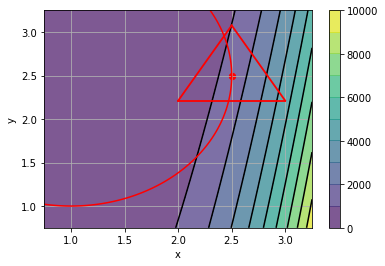

In [ ]:
  print('Графік 10\n')
  graph10()

In [ ]:
R(2, 2.211), R(3, 2.211), R(2.5, 3.077)

(321.05210000000005, 4613.0521, 1009.0428999999999)

Вершина, що відповідає найменьшому на нульовому етапі ($k=0$) значенню $R(x, y)$, знаходиться в точці $x_l^{(0)}=x_{1}^{(0)}$; в цій точці $R(x_l^{(0)})\approx321$ . Відповідно найбільше значення $R(x, y)$ набуває в точці $x_h^{(0)}=x_{2}^{(0)}$; $~~R(x_h^{(0)})\approx4613$.

*Зауваження: при використанні кольорового графіку ізоліній безспосереднє обчислення значень функції у вершинах може не бути необхідним.*

In [ ]:
pow(h1(2, 2.211)**2, 1/2)

1.1664789999999998

Значення $T(x)=[(x - 1)^2 + (y - 2.5)^2 - 2.25]^{1/2}$ в точці $x_l^{(0)}$ дорівнює $~T(x_l^{(0)})\approx1.166~~$ і, оскільки $~\Phi^{(0)}-T(x_l^{(0)})\approx2.834>0$, точка $x_l^{(0)}$ може розглядатись як "майже допустима". Немає жодної необхідності перевіряти виконання нерівності $~\Phi^{(0)}-T(x,y)\geq0$ для двох інших вершин, оскільки в процесі оптимізації ці вершини будуть замінені іншими вершинами з покращеними значеннями функції Розенброка. Центр мас для $x_1^{(0)}$ та $x_3^{(0)}$ знаходиться в точці $x_4^{(0)}=[2.25~~~2.644]^T$. При $\alpha=1$ точка, симетрична точці $x_h^{(0)}$ відносно $x_4^{(0)}$, задається вектором $x_5^{(0)}=[1.5~~~3.077]^T$.

Графік 11



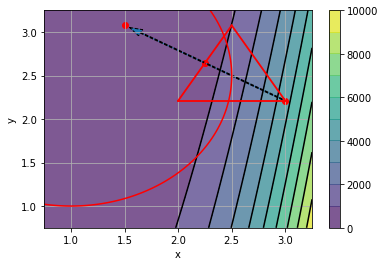

In [ ]:
print('Графік 11\n')
graph11()

In [ ]:
print(pow(h1(1.5, 3.077)**2, 1/2))
print(R(1.5, 3.077))

1.667071
68.64289999999998


В точці $x_5^{(0)}$ функціонал $T(x, y)$ набуває значення $T(x_5^{(0)})\approx1.667$. Оскільки $~\Phi^{(0)}-T(x_5^{(0)})\approx2.333>0$, точка $x_5^{(0)}$ може розглядатись як "майже допустима"; $~R(x_5^{(0)})\approx69$. Оскільки $R(x_5^{(0)})<R(x_l^{(0)})$, при $\gamma=2$ наступним кроком є операція розтягнення, що дає $x_6^{(0)}=[0.75~~~3.51]^T$.

Графік 12


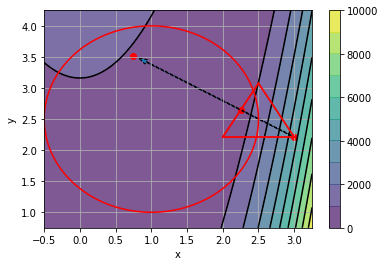

In [ ]:
print('Графік 12')
graph12()

In [ ]:
print(pow(h1(0.75, 3.51)**2, 1/2))
print(R(0.75, 3.51))

1.1674000000000004
868.838125


В точці $x_6^{(0)}$ функціонал $T(x, y)$ набуває значення $T(x_5^{(0)})\approx1.167$. Оскільки $~\Phi^{(0)}-T(x_5^{(0)})\approx2.833>0$, точка $x_6^{(0)}$ може розглядатись як "майже допустима". З іншого боку $~R(x_6^{(0)})\approx869$. Тому повертаємось до точки $x_5^{(0)}$, і на цьому нульовий етап ($k=0$) оптимізаційного пошуку закінчується. Вершина $x_5^{(0)}$ ототожнюється з точкою $x^{(1)}$ , для якої повторюється схема пошуку, проілюстрована вище для початкової точки $x^{(0)}$. 

Обчислювальна процедура, виконана за схемою, проілюстрваною для нульового ($k=0$) етапу оптимізаційного пошуку, повторюється на наступних етапах $k=1,~2,~3,~...$; ці операції повторюються, поки значення $\Phi^{(k)}$ не буде задовольняти умові $\Phi^{(k)}\leq\varepsilon$.

## Висновки


Зображена на графіках 1-3 функція Розенброка задається рівнянням $~z = (1 -x)^{2} + 100(y-x^2)^2$ . Вона є диференійованою на всій можині визначення. Розв'язавши систему рівнянь $\begin{cases}
    \partial_x f(x, y) = 0\\
    \partial_y f(x, y) = 0\\
 \end{cases}$,  неважко переконатись, що її глобальний мінімум знаходиться в точці (1, 1), в якій вона набуває значення 0.

На графіках 4, 5 бачимо, що застосування до кореневої функції методу Нелдера-Міда дає доволі точні результати за відносно невелику кількість ітерацій. Так, порівнюючи із застосуванням методу найскорішого спуску з оптимальним кроком (графік 8), бачимо абсолютну перевагу реалізацій метода Нелдера-Міда з використанням scipy.optimize.

Ще більш очевидною перевага метода Нелдера-Міда стає при "поітераційному" порівнянні з методом найскорішого спуску. Так, порівнюючи результати, відображені на серії графіків "Графік 6" та на графіку 7 можна побачити, що за перші 9 ітерацій метод Нелдера-Міда дає суттєво точніше наближення точки мінімуму, ніж метод найскорішого спуску.

Варто зауважити, що ефективність застосування симплекс-методу, зокрема, методу Нелдера-Міда, істотньо залежить від вибору початкового симплексу. Це можна побачити порівнюючи графік 4 та графік 5. У випадку наявності процедури знаходження оптимального початкового симплексу (допоміжна функція init_simplex), подальше застосування функції scipy.optimize є більш ефективним.

В ході роботи також був розглянутий метод ковзного допуску, який базується на методі Нелдера-Міда. Ітерація цього метода була детально проілюстрована на графіках 9-12.